# K-NN Breast Cancer Dataset 
#### Brief Overview of the Dataset
##### The breast cancer dataset is a widely used dataset in machine learning and medical research, primarily for binary classification tasks. The dataset is used to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on various features extracted from cell nuclei present in breast tissue samples.

### Key Details:
- Source: The dataset is publicly available and provided by the UCI Machine Learning Repository.
- Number of Instances: 569 samples.
- Number of Features: 30 numerical features, which are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics such as the radius, texture, perimeter, area, smoothness, and more.
- Target Variable: A binary target variable indicating the diagnosis:
  - 0: Benign
  - 1: Malignant
### Objective: Classifying whether a tumor is malignant or benign.

#### Importing libraries

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

In [3]:
df = pd.read_csv('breast cancer dataset.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.shape

(569, 33)

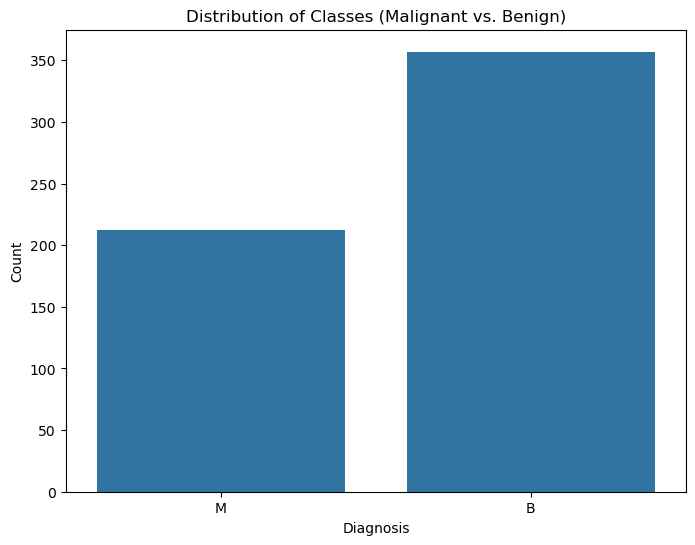

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Classes (Malignant vs. Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

### Pre-processing :drop un necessary columns

In [14]:
df.drop( columns = [ 'id' , 'Unnamed: 32'] , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### analyze our target column

In [17]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [19]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [21]:
df.shape

(569, 31)

### split the data

In [24]:
feature = df.drop('diagnosis' , axis = 1)
target = df['diagnosis']

In [26]:
feature.sample(7)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
94,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.088150,0.1855,0.06284,...,18.230,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,0.1828,0.06757,...,9.565,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712
494,13.160,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.012560,0.1713,0.05888,...,14.500,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,0.1985,0.07098,...,10.170,22.80,64.01,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.119800,0.2113,0.07115,...,20.800,27.78,149.60,1304.0,0.1873,0.5917,0.90340,0.19640,0.3245,0.11980
33,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.075930,0.1853,0.06261,...,24.150,30.90,161.40,1813.0,0.1509,0.6590,0.60910,0.17850,0.3672,0.11230
104,10.490,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.012010,0.2217,0.06481,...,11.540,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552


In [27]:
target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [30]:
X_train, X_test, y_train, y_test = train_test_split(feature , target ,test_size=0.2, random_state=42)

In [31]:
X_train.sample(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
291,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.1313,0.3030,0.1804,0.1489,0.2962,0.08472
426,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,0.1925,0.06915,...,12.13,21.57,81.41,440.4,0.1327,0.2996,0.2939,0.0931,0.3020,0.09646


In [34]:
X_test.sample(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
163,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.1452,0.2338,0.16880,0.08194,0.2268,0.09082
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.027550,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.1358,0.1507,0.12750,0.08750,0.2733,0.08022
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,11.95,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300,0.06769


In [35]:
X_train.shape

(455, 30)

In [38]:
X_test.shape

(114, 30)

### Feature scaling (important for k-NN).

In [41]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [45]:
X_test

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

### Selecting the Model

In [84]:
knn = KNeighborsClassifier(n_neighbors=8)

In [86]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [88]:
y_pred = knn.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

In [90]:
AccuracyScore = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', AccuracyScore)

Accuracy Score:  0.956140350877193


In [92]:
AccuracyScores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    AccuracyScores.append(accuracy_score(y_test, y_pred))

In [93]:
AccuracyScores

[0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9649122807017544,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193]

In [82]:
np.argmax(AccuracyScores)

8

### Model Evaluation 

In [99]:
AccuracyScore = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', AccuracyScore)

Accuracy Score:  0.956140350877193


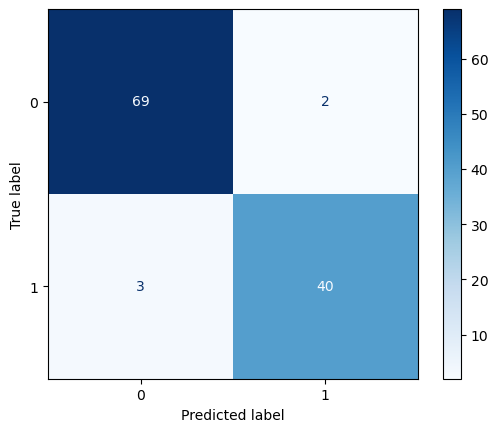

In [109]:
# Compute confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix)
disp.plot(cmap='Blues')
plt.show()

In [111]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### k-Fold Cross-Validation

- Implement k-Fold Cross-Validation using cross_val_score.
- Determine the best k value by plotting accuracy vs. k.

In [124]:
# Define range of k values (number of folds)
k_range = range(2, 21)
mean_accuracies = []

# Perform k-Fold Cross-Validation for different k values
for k in k_range:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(knn, feature, target, cv=kf, scoring='accuracy')
    mean_accuracies.append(scores.mean())


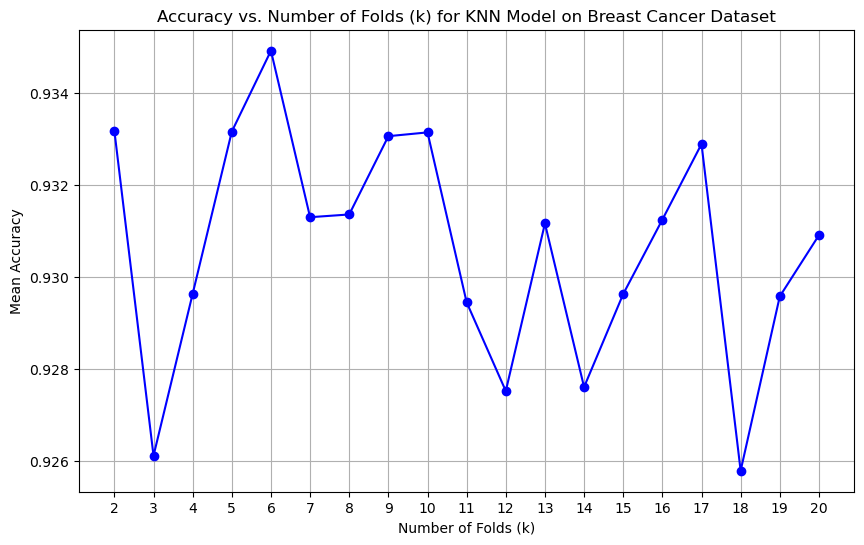

In [126]:
# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Folds (k) for KNN Model on Breast Cancer Dataset')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [130]:
best_k = 6
kf_best = KFold(n_splits=best_k, shuffle=True, random_state=42)
scores_best = cross_val_score(knn, feature, target, cv=kf_best, scoring='accuracy')

print(f"Mean Accuracy with {best_k}-Fold Cross-Validation: {scores_best.mean():.4f}")
print(f"Standard Deviation of Accuracy: {scores_best.std():.4f}")

Mean Accuracy with 6-Fold Cross-Validation: 0.9349
Standard Deviation of Accuracy: 0.0326


### Summary
- Optimal 𝑘 : results suggest that 6 folds give the best mean accuracy.
- Validation: we can use this value to validate your model’s performance for a reliable estimate.
- Visualization: The plot shows how accuracy varies with the number of folds, helping to understand the trade-offs.